<a href="https://colab.research.google.com/github/julianasodata/julianasodata/blob/main/Analise_Sentimentos_Redes_Sociais_(NPL_Insights).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisar Sentimentos no Reddit! 🙂 😞 😐

## Informações necessários conexão com a API do Reddit:

https://www.reddit.com/prefs/apps

Nome app reddit: sodata_analyzing_user_sentiment

user: Longjumping_Equal809

password: 6pGBbr9JJWITpMLwEV7bNumPRjdD2g

personal use script: kTBn7UY0f3odpT1VoVYUtQ

> Baixar pacotes necessários para esse projeto. (langdetect, praw)

In [21]:
!pip install langdetect praw
!pip install googletrans==4.0.0-rc1

> 'Código da conexão com API do Reddit.

In [22]:
import praw
import pandas as pd

# Autenticação
reddit = praw.Reddit(client_id='kTBn7UY0f3odpT1VoVYUtQ',
                     client_secret='6pGBbr9JJWITpMLwEV7bNumPRjdD2g',
                     user_agent='Longjumping_Equal809')
if reddit is not None:
  print("Autenticação bem-sucedida!")
  # Coletar posts
  subreddit = reddit.subreddit('world')
  posts = []
  for post in subreddit.hot(limit=1000):
    posts.append([post.title, post.selftext])

  # Criar DataFrame
  df = pd.DataFrame(posts, columns=['Title', 'Text'])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Autenticação bem-sucedida!


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [23]:
df.head()


,Title,Text
0,DeepSeek 'shared user data' with TikTok owner ...,
1,More than 150 whales stranded on remote Austra...,
2,Chinese navy helicopter flies within 10 feet o...,
3,Jair Bolsonaro charged over alleged far-right ...,
4,"Pope Francis has double pneumonia, respiratory...",


In [24]:
df.describe()

,Title,Text
count,813,813
unique,809,131
top,Discover the Safest Countries in the World: An...,
freq,2,682


In [25]:
df.shape

(813, 2)

> Verificar se o texto é em Português.


In [26]:
from langdetect import detect

def is_portuguese(text):
    try:
        return detect(text) == 'pt'
    except:
        return False

# Filtrar posts em português
posts_pt = [post for post in posts if is_portuguese(post[1])]

# Criar DataFrame
df_pt = pd.DataFrame(posts_pt, columns=['Title', 'Text'])

df_pt.shape

(2, 2)

> Limpar o texto e prepara para a analise.

In [27]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\W', ' ', text)      # Remove caracteres especiais
    text = text.lower()                  # Converte para minúsculas
    return text

df['Cleaned_Text'] = df['Title'].apply(clean_text)

> Código de analise do texto utilizando a bibioteca TextBlob.

In [28]:
from textblob import TextBlob
from textblob.exceptions import NotTranslated
from googletrans import Translator

# Criar o objeto tradutor
translator = Translator()

def analyze_sentiment(text):
    try:
        # Detectar o idioma do texto
        detected_lang = translator.detect(text).lang
        # Traduzir apenas se o texto não estiver em inglês
        if detected_lang != 'en':
            text = translator.translate(text, src=detected_lang, dest="en").text
            print("Texto traduzido: " + text)
    except Exception as e:
        pass

    # Criar um objeto TextBlob para análise de sentimento
    analysis = TextBlob(text)
    # Determinar o sentimento com base na polaridade
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutro'
    else:
        return 'Negativo'

# Aplicar a análise de sentimento
df['Sentiment'] = df['Cleaned_Text'].apply(analyze_sentiment)

Texto traduzido: Kailash Mansarovar Yatra Soon India China Reach Consensus 6 Points
Texto traduzido: What do you think
Texto traduzido: TikTok Tshe War was
Texto traduzido: Hello to everyone for 23 years old, my father said that I died for him when I was only 13 and until that moment I did everything to hear the words I am proud to ask questions if interesting
Texto traduzido: Israel Terrorists State
Texto traduzido: Good night
Texto traduzido: How are you
Texto traduzido: My boyfriend behaves strange
Texto traduzido: father
Texto traduzido: Tiktok World Trip
Texto traduzido: Hoods of Zadar Boulevar Bronx Croatia
Texto traduzido: Barceloneta p r
Texto traduzido: take a look
Texto traduzido: Participate and get unique profile frames with Disney themes on Tiktok
Texto traduzido: Infinite Reset Theory
Texto traduzido: Doctors
Texto traduzido: Chefchaouen Kasbah Spanish Mosque Morocco Kasbah and the Spanish Mosque
Texto traduzido: Lørenskog Norway 4K HDR Walking Tour 2022
Texto traduzido: 

In [29]:
df.head()


,Title,Text,Cleaned_Text,Sentiment
0,DeepSeek 'shared user data' with TikTok owner ...,,deepseek shared user data with tiktok owner ...,Neutro
1,More than 150 whales stranded on remote Austra...,,more than 150 whales stranded on remote austra...,Positivo
2,Chinese navy helicopter flies within 10 feet o...,,chinese navy helicopter flies within 10 feet o...,Neutro
3,Jair Bolsonaro charged over alleged far-right ...,,jair bolsonaro charged over alleged far right ...,Positivo
4,"Pope Francis has double pneumonia, respiratory...",,pope francis has double pneumonia respiratory...,Neutro


> Apresentar o gráfico com o resultado da analise de sentimento encontrada no texto.

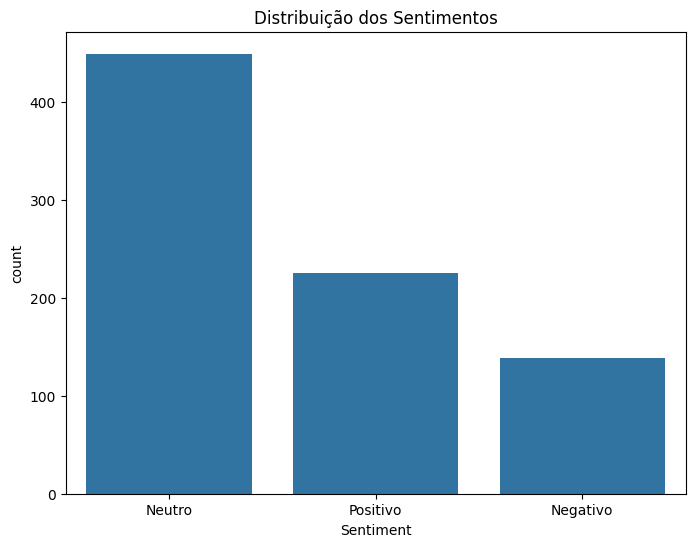

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribuição dos Sentimentos')
plt.show()